In [1]:
import matplotlib.pyplot as plt
from rank import RANK
from tank import TANK
import numpy as np
import params

np.set_printoptions(suppress=True, precision=10, linewidth=250)
plt.style.use('default')
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
})

In [2]:
# paramaters
PAGE_WIDTH = 6.5 # 8.5 in page - 2*1 in margins
T = 25 # max time
i = 2 # index of shock we observe

save = True

In [3]:
# initialize models
rank = RANK(params)
tank = TANK(params)

# irfs
rank_irf = rank.run_impulse_response(T, i)
tank_irf = tank.run_impulse_response(T, i)

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/Macro/Capstone/draft/code/utils.py:99: UserWarning: LTI did not converge. Error: 4.76837158203125e-07
  warnings.warn(f'LTI did not converge. Error: {err}')
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/Macro/Capstone/draft/code/utils.py:99: UserWarning: LTI did not converge. Error: 3.814697265625e-06
  warnings.warn(f'LTI did not converge. Error: {err}')


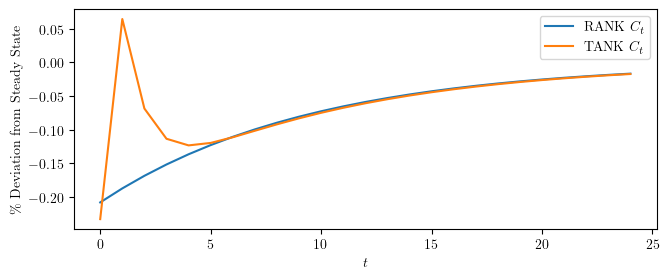

In [4]:
# consumption response
fig, ax = plt.subplots()
fig.set_figwidth(PAGE_WIDTH)
fig.set_figheight(PAGE_WIDTH / 2.5)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'\% Deviation from Steady State')

ax.plot(rank_irf.T[:, 2], label=RANK.LABELS[2])
ax.plot(tank_irf.T[:, 2], label=TANK.LABELS[2])

ax.legend()
fig.tight_layout(pad=0)
if save: fig.savefig('../document/graphs/govt_shock_c.pdf', bbox_inches='tight', pad_inches=0.05)

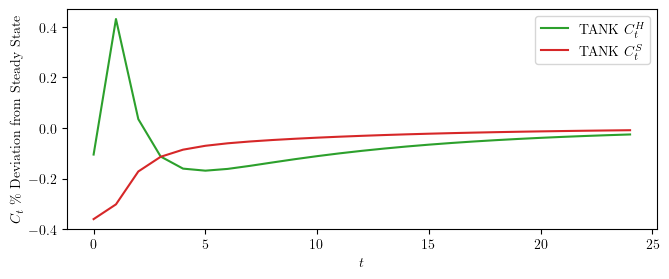

In [5]:
# consumption response
fig, ax = plt.subplots()
fig.set_figwidth(PAGE_WIDTH)
fig.set_figheight(PAGE_WIDTH / 2.5)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$C_t$ \% Deviation from Steady State')

ax.plot(tank_irf.T[:, 3], label=TANK.LABELS[3], c='tab:green')
ax.plot(tank_irf.T[:, 4], label=TANK.LABELS[4], c='tab:red')

ax.legend()
fig.tight_layout(pad=0)
if save: fig.savefig('../document/graphs/govt_shock_chs.pdf', bbox_inches='tight', pad_inches=0.05)

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/Macro/Capstone/draft/code/utils.py:99: UserWarning: LTI did not converge. Error: 6.31053808319848e-07
  warnings.warn(f'LTI did not converge. Error: {err}')
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/Macro/Capstone/draft/code/utils.py:99: UserWarning: LTI did not converge. Error: 9.5367431640625e-07
  warnings.warn(f'LTI did not converge. Error: {err}')


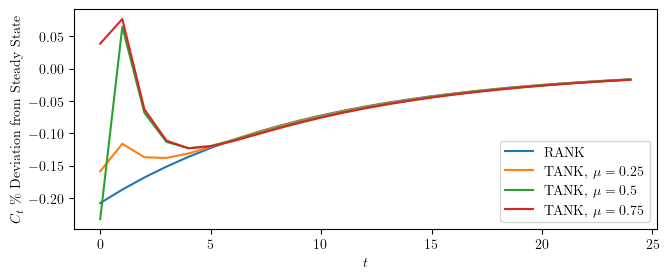

In [6]:
params.mu = 0.25
tank25 = TANK(params)
tank25_irf = tank25.run_impulse_response(T, i)

params.mu = 0.75
tank75 = TANK(params)
tank75_irf = tank75.run_impulse_response(T, i)

# consumption response
fig, ax = plt.subplots()
fig.set_figwidth(PAGE_WIDTH)
fig.set_figheight(PAGE_WIDTH / 2.5)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$C_t$ \% Deviation from Steady State')

ax.plot(rank_irf.T[:, 2], label='RANK')
ax.plot(tank25_irf.T[:, 2], label=r'TANK, $\mu = 0.25$')
ax.plot(tank_irf.T[:, 2], label=r'TANK, $\mu = 0.5$')
ax.plot(tank75_irf.T[:, 2], label=r'TANK, $\mu = 0.75$')

ax.legend()
fig.tight_layout(pad=0)
if save: fig.savefig('../document/graphs/govt_shock_by_mu.pdf', bbox_inches='tight', pad_inches=0.05)